In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
url  = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto7/PCR.csv"
data = pd.read_csv(url)

In [62]:
data.head(16)

,Region,Codigo region,Poblacion,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19
0,Arica y Parinacota,15,252110,70,-,-,103,-,93,24,198,131,-,155
1,Tarapacá,1,382773,-,-,-,-,-,-,-,30,-,60,0
2,Antofagasta,2,691854,182,128,107,175,103,95,117,117,143,200,129
3,Atacama,3,314709,57,52,60,25,20,22,25,29,37,50,31
4,Coquimbo,4,836096,-,-,-,-,-,-,-,-,-,-,-
5,Valparaíso,5,1960170,301,249,248,273,223,92,385,240,246,330,166
6,Metropolitana,13,8125072,5383,3158,2105,3861,1850,1656,2694,4356,3670,2744,3475
7,O’Higgins,6,991063,68,-,74,-,74,30,30,58,50,-,0
8,Maule,7,1131939,397,219,-,341,113,160,-,469,367,176,0
9,Ñuble,16,511551,364,-,259,189,65,-,-,110,159,76,127


In [63]:
data = data.replace({"-": 0})         ##Reemplazamos los valores -  con un 0
data = data.replace(np.nan, 0)        ##Reemplazamos los valores no existentes con un 0

In [64]:
for col in data.columns:              ## Cambiamos el tipo de data
    if col != "Region" and col != "Poblacion":
        data[col] = data[col].astype(int)

## Mostramos la Información entregada por el ministerios de Ciencia
* Los valores que están en 0 fueron transformados desde valores no entregados como "-" o NaN. Para un mejor trabajo de los datos. EN NINGUN CASO SIGNIFICA QUE EN ESOS DIAS SE HICIERON 0 TEST POR REGIÓN.

In [65]:
data

,Region,Codigo region,Poblacion,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19
0,Arica y Parinacota,15,252110,70,0,0,103,0,93,24,198,131,0,155
1,Tarapacá,1,382773,0,0,0,0,0,0,0,30,0,60,0
2,Antofagasta,2,691854,182,128,107,175,103,95,117,117,143,200,129
3,Atacama,3,314709,57,52,60,25,20,22,25,29,37,50,31
4,Coquimbo,4,836096,0,0,0,0,0,0,0,0,0,0,0
5,Valparaíso,5,1960170,301,249,248,273,223,92,385,240,246,330,166
6,Metropolitana,13,8125072,5383,3158,2105,3861,1850,1656,2694,4356,3670,2744,3475
7,O’Higgins,6,991063,68,0,74,0,74,30,30,58,50,0,0
8,Maule,7,1131939,397,219,0,341,113,160,0,469,367,176,0
9,Ñuble,16,511551,364,0,259,189,65,0,0,110,159,76,127


## Cantidad de tests totales realizados a lo largo del tiempo en el pais

In [66]:
fechas = data.columns[(data.columns != 'Region') & (data.columns != 'Poblacion') & (data.columns != "Codigo region")]

In [67]:
X = []
Y = []
for fecha in fechas:
    total = data[fecha].sum()
    Y.append(total)
    X.append(fecha)

In [68]:
def labelonbars(X, Y):
    n = len(X)
    for i in range (n):
        number = '{:,}'.format(int(Y[i])).replace(',', '.')
        plt.annotate(
            number, xy=(X[i], Y[i]),
            xytext =(0, 1),
            textcoords="offset points",
            ha ='center', va='bottom')

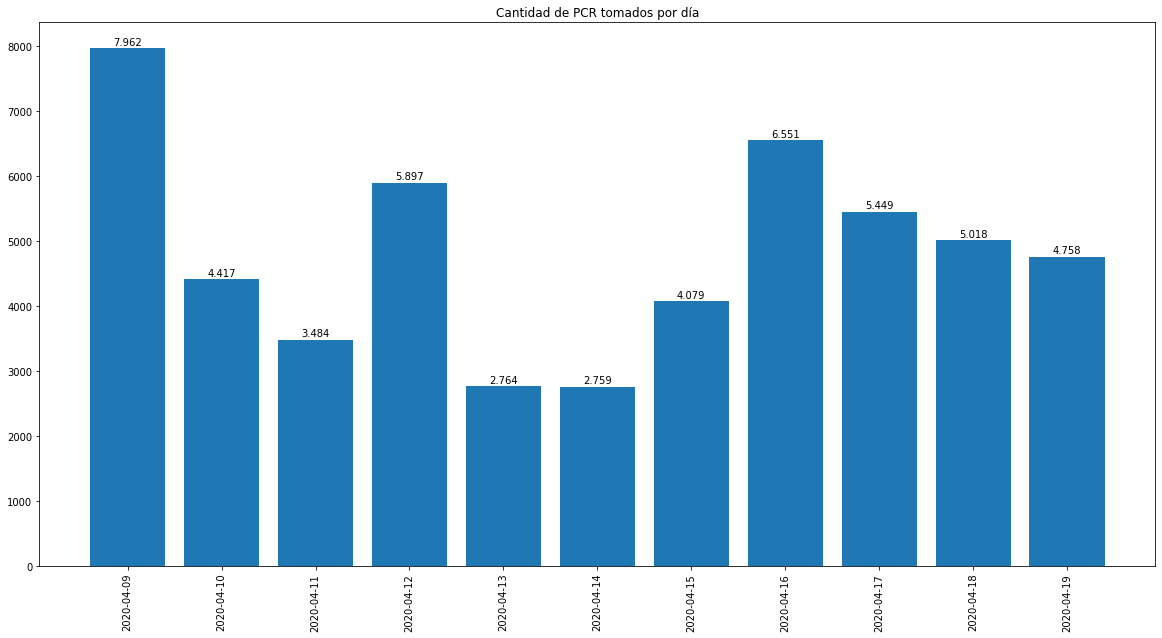

In [69]:
plt.figure(figsize=(20,10))
plt.bar(X,Y)
plt.xticks(X, rotation='vertical')
plt.title("Cantidad de PCR tomados por día")
labelonbars(X, Y)
plt.show()